In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [3]:
color_df = pd.read_csv('raw_corpus_data/wals/number_non_derived_color_categories.tsv', sep='\t', on_bad_lines='skip')
color_df

,wals code,name,value,description,latitude,longitude,genus,family,area
0,abd,Abidji,2,3.5,5.666667,-4.583333,Agneby,Niger-Congo,Lexicon
1,aga,Agarabi,5,5.0,-6.166667,146.000000,Gauwa,Trans-New Guinea,Lexicon
2,agc,Agta (Central),5,5.0,17.966667,121.833333,Greater Central Philippine,Austronesian,Lexicon
3,agu,Aguacatec,5,5.0,15.416667,-91.333333,Mayan,Mayan,Lexicon
4,amk,Amarakaeri,6,5.5,-12.500000,-70.500000,Harakmbet,Harakmbet,Lexicon
...,...,...,...,...,...,...,...,...,...
114,ykn,Yakan,7,6.0,6.500000,122.000000,Sama-Bajaw,Austronesian,Lexicon
115,yam,Yaminahua,5,5.0,-8.000000,-73.000000,Panoan,Pano-Tacanan,Lexicon
116,ycn,Yucuna,5,5.0,-0.750000,-71.000000,Japura-Colombia,Arawakan,Lexicon
117,yus,Yupik (Siberian),5,5.0,65.000000,-173.000000,Eskimo,Eskimo-Aleut,Lexicon


In [4]:
order_df = pd.read_csv('raw_corpus_data/wals/order_adj_noun.tsv', sep='\t', on_bad_lines='skip')
order_df

,wals code,name,value,description,latitude,longitude,genus,family,area
0,xoo,!Xóõ,2,Noun-Adjective,-24.000000,21.500000,Tu,Tu,Word Order
1,ani,//Ani,1,Adjective-Noun,-18.916667,21.916667,Khoe-Kwadi,Khoe-Kwadi,Word Order
2,xam,/Xam,2,Noun-Adjective,-31.000000,21.000000,Tu,Tu,Word Order
3,huc,=|Hoan,2,Noun-Adjective,-25.500000,25.000000,=|Hoan,Kxa,Word Order
4,aar,Aari,2,Noun-Adjective,6.000000,36.583333,South Omotic,Afro-Asiatic,Word Order
...,...,...,...,...,...,...,...,...,...
1362,zul,Zulu,2,Noun-Adjective,-30.000000,30.000000,Bantu,Niger-Congo,Word Order
1363,zun,Zuni,2,Noun-Adjective,35.083333,-108.833333,Zuni,Zuni,Word Order
1364,rgc,rGyalrong (Caodeng),2,Noun-Adjective,31.666667,101.750000,rGyalrong,Sino-Tibetan,Word Order
1365,eme,Émérillon,2,Noun-Adjective,3.166667,-52.416667,Maweti-Guarani,Tupian,Word Order


In [4]:
joint_df = order_df.merge(color_df, on='wals code')
joint_df

,wals code,name_x,value_x,description_x,latitude_x,longitude_x,genus_x,family_x,area_x,name_y,value_y,description_y,latitude_y,longitude_y,genus_y,family_y,area_y
0,aga,Agarabi,1,Adjective-Noun,-6.166667,146.000000,Gauwa,Trans-New Guinea,Word Order,Agarabi,5,5.0,-6.166667,146.000000,Gauwa,Trans-New Guinea,Lexicon
1,agc,Agta (Central),1,Adjective-Noun,17.966667,121.833333,Greater Central Philippine,Austronesian,Word Order,Agta (Central),5,5.0,17.966667,121.833333,Greater Central Philippine,Austronesian,Lexicon
2,amk,Amarakaeri,1,Adjective-Noun,-12.500000,-70.500000,Harakmbet,Harakmbet,Word Order,Amarakaeri,6,5.5,-12.500000,-70.500000,Harakmbet,Harakmbet,Lexicon
3,api,Apinayé,2,Noun-Adjective,-5.500000,-48.000000,Je Setentrional,Macro-Ge,Word Order,Apinayé,5,5.0,-5.500000,-48.000000,Je Setentrional,Macro-Ge,Lexicon
4,cak,Cakchiquel,1,Adjective-Noun,14.500000,-91.000000,Mayan,Mayan,Word Order,Cakchiquel,7,6.0,14.500000,-91.000000,Mayan,Mayan,Lexicon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,tuc,Tucano,3,No dominant order,0.500000,-69.166667,Tucanoan,Tucanoan,Word Order,Tucano,5,5.0,0.500000,-69.166667,Tucanoan,Tucanoan,Lexicon
59,wao,Waorani,3,No dominant order,-1.000000,-76.500000,Waorani,Waorani,Word Order,Waorani,3,4.0,-1.000000,-76.500000,Waorani,Waorani,Lexicon
60,wrl,Warlpiri,2,Noun-Adjective,-20.000000,132.333333,Western Pama-Nyungan,Pama-Nyungan,Word Order,Warlpiri,5,5.0,-20.000000,132.333333,Western Pama-Nyungan,Pama-Nyungan,Lexicon
61,yam,Yaminahua,2,Noun-Adjective,-8.000000,-73.000000,Panoan,Pano-Tacanan,Word Order,Yaminahua,5,5.0,-8.000000,-73.000000,Panoan,Pano-Tacanan,Lexicon


In [ ]:
map_from_string_to_float = {
    '3-4': 3.5,
    '4.5-5.5': 5,
    '6-6.5': 6.25,
    '7-7.5': 7.25,
    '8-8.5': 8.25,
    '9-10': 9.5,
    '11': 11
}

In [ ]:
floats_list = []
for item in joint_df['description_y']:
    floats_list.append(map_from_string_to_float[item])
joint_df.insert(loc=0, column='description_y_float', value=floats_list)
joint_df

In [6]:
# get rid of the one random language
joint_df = joint_df[~(joint_df['description_x'] == 'Only internally-headed relative clauses')]
joint_df

,wals code,name_x,value_x,description_x,latitude_x,longitude_x,genus_x,family_x,area_x,name_y,value_y,description_y,latitude_y,longitude_y,genus_y,family_y,area_y
0,aga,Agarabi,1,Adjective-Noun,-6.166667,146.000000,Gauwa,Trans-New Guinea,Word Order,Agarabi,5,5.0,-6.166667,146.000000,Gauwa,Trans-New Guinea,Lexicon
1,agc,Agta (Central),1,Adjective-Noun,17.966667,121.833333,Greater Central Philippine,Austronesian,Word Order,Agta (Central),5,5.0,17.966667,121.833333,Greater Central Philippine,Austronesian,Lexicon
2,amk,Amarakaeri,1,Adjective-Noun,-12.500000,-70.500000,Harakmbet,Harakmbet,Word Order,Amarakaeri,6,5.5,-12.500000,-70.500000,Harakmbet,Harakmbet,Lexicon
3,api,Apinayé,2,Noun-Adjective,-5.500000,-48.000000,Je Setentrional,Macro-Ge,Word Order,Apinayé,5,5.0,-5.500000,-48.000000,Je Setentrional,Macro-Ge,Lexicon
4,cak,Cakchiquel,1,Adjective-Noun,14.500000,-91.000000,Mayan,Mayan,Word Order,Cakchiquel,7,6.0,14.500000,-91.000000,Mayan,Mayan,Lexicon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,tuc,Tucano,3,No dominant order,0.500000,-69.166667,Tucanoan,Tucanoan,Word Order,Tucano,5,5.0,0.500000,-69.166667,Tucanoan,Tucanoan,Lexicon
59,wao,Waorani,3,No dominant order,-1.000000,-76.500000,Waorani,Waorani,Word Order,Waorani,3,4.0,-1.000000,-76.500000,Waorani,Waorani,Lexicon
60,wrl,Warlpiri,2,Noun-Adjective,-20.000000,132.333333,Western Pama-Nyungan,Pama-Nyungan,Word Order,Warlpiri,5,5.0,-20.000000,132.333333,Western Pama-Nyungan,Pama-Nyungan,Lexicon
61,yam,Yaminahua,2,Noun-Adjective,-8.000000,-73.000000,Panoan,Pano-Tacanan,Word Order,Yaminahua,5,5.0,-8.000000,-73.000000,Panoan,Pano-Tacanan,Lexicon


In [22]:
joint_df['wals code'].value_counts()

aga    1
srn    1
mzc    1
mey    1
mxp    1
      ..
klq    1
jva    1
kor    1
kya    1
ycn    1
Name: wals code, Length: 62, dtype: int64

In [7]:
joint_df.groupby('description_x')['description_y'].mean()

description_x
Adjective-Noun       5.475000
No dominant order    5.125000
Noun-Adjective       4.779412
Name: description_y, dtype: float64

In [8]:
joint_df['description_x'].value_counts()

Noun-Adjective       34
Adjective-Noun       20
No dominant order     8
Name: description_x, dtype: int64

In [10]:
scipy.stats.ttest_ind(joint_df[joint_df['description_x'] == 'Noun-Adjective']['description_y'], 
                      joint_df[joint_df['description_x'] == 'Adjective-Noun']['description_y'])

Ttest_indResult(statistic=-3.0158899242440467, pvalue=0.003957817730234515)

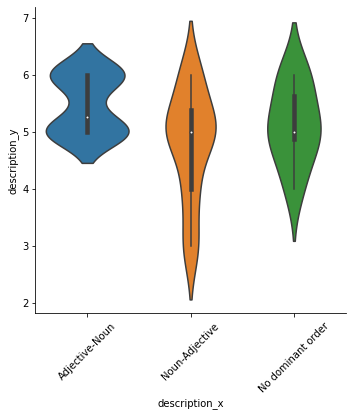

In [12]:
ax = sns.catplot(x='description_x', y='description_y', data=joint_df, kind='violin')
plt.xticks(rotation=45)
plt.show()

In [13]:
joint_df['name_x'].unique()

array(['Agarabi', 'Agta (Central)', 'Amarakaeri', 'Apinayé', 'Cakchiquel',
       'Campa (Axininca)', 'Camsá', 'Cavineña', 'Cayapa',
       'Chinantec (Lealao)', 'Chácobo', 'Dan', 'Didinga', 'English',
       'Ese Ejja', 'Folopa', 'French', 'Garífuna', 'German', 'Guarijío',
       'Huastec', 'Huave (San Mateo del Mar)', 'Iduna', 'Ifugao (Batad)',
       'Japanese', 'Kalam', 'Karajá', 'Korean', 'Kuku-Yalanji', 'Kwerba',
       'Lele', 'Mandarin', 'Matsés', 'Mazatec (Chiquihuitlán)', 'Menya',
       'Mixtec (Peñoles)', 'Murle', 'Murrinh-Patha',
       'Nahuatl (North Puebla)', 'Ndyuka', 'Ngäbere', "O'odham", 'Patep',
       'Pirahã', 'Russian', 'Shipibo-Konibo', 'Sirionó', 'Slave',
       'Spanish', 'Tabla', 'Tacana', 'Tarahumara (Central)',
       'Tarahumara (Western)', 'Tboli', 'Teribe', 'Tlapanec', 'Tsafiki',
       'Tucano', 'Waorani', 'Warlpiri', 'Yaminahua', 'Yucuna'],
      dtype=object)

In [15]:
industrialized_languages = [
    'English',
    'French',
    'German',
    'Japanese',
    'Korean',
    'Mandarin',
    'Russian',
    'Spanish'
]

unindustrialized_joint_df = joint_df[~joint_df['name_x'].isin(industrialized_languages)]
unindustrialized_joint_df.groupby('description_x')['description_y'].mean()

description_x
Adjective-Noun       5.250000
No dominant order    5.125000
Noun-Adjective       4.703125
Name: description_y, dtype: float64

In [16]:
unindustrialized_joint_df['description_x'].value_counts()

Noun-Adjective       32
Adjective-Noun       14
No dominant order     8
Name: description_x, dtype: int64

In [17]:
scipy.stats.ttest_ind(unindustrialized_joint_df[unindustrialized_joint_df['description_x'] == 'Noun-Adjective']['description_y'], 
                      unindustrialized_joint_df[unindustrialized_joint_df['description_x'] == 'Adjective-Noun']['description_y'])

Ttest_indResult(statistic=-2.091249992998047, pvalue=0.042312515601097486)

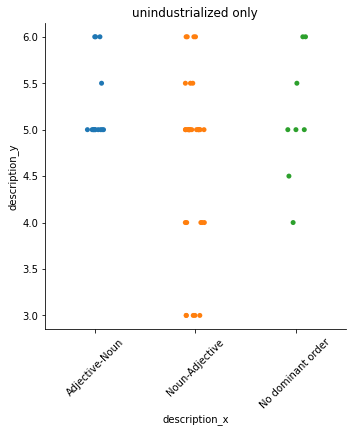

In [21]:
ax = sns.catplot(x='description_x', y='description_y', data=unindustrialized_joint_df)
plt.xticks(rotation=45)
plt.title('unindustrialized only')
plt.show()

In [20]:
set(color_df['name']) - set(joint_df['name_x'])

{'Abidji',
 'Aguacatec',
 'Ampeeli',
 'Amuzgo',
 'Angaataha',
 'Arabela',
 'Arabic (Lebanese)',
 'Bahinemo',
 'Bauzi',
 'Berik',
 'Bhili',
 'Buglere',
 'Bété',
 'Candoshi',
 'Chavacano',
 'Chayahuita',
 'Chiquitano',
 'Chumburung',
 'Cofán',
 'Cree (Swampy)',
 'Culina',
 'Dyimini',
 'Ejagham',
 'Guahibo',
 'Guambiano',
 'Gunu',
 'Halbi',
 'Iwam',
 'Kamano-Kafe',
 'Kemtuik',
 'Kokni',
 'Konkomba',
 'Kriol (Ngukurr)',
 'Kuna',
 'Mampruli',
 'Maring',
 'Martu Wangka',
 'Mawchi',
 'Mazahua',
 'Micmac',
 'Mikasuki',
 'Mündü',
 'Nafaanra',
 'Ocaina',
 'Pech',
 'Saramaccan',
 'Seri',
 'Sursurunga',
 'Ticuna',
 'Tifal',
 'Tol',
 'Vagla',
 'Vasavi',
 'Wobe',
 'Yakan',
 'Yupik (Siberian)',
 'Zapotec (Texmelucan)'}